In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [6]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [7]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [8]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile
from   poisson     import fillfactor_expectation

In [9]:
survey    = 'gama'
version   = 'GAMA4'
dryrun    = False

In [10]:
fpath     = findfile(ftype='ddp_n8', dryrun=dryrun, version=version, survey=survey)
gama_ddp  = Table.read(fpath)
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],WEIGHT_STEPWISE,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,int64
388240,587727944566112503,139.23047512,2.42943373,19.356083,0.11227,4,G09_Y2_031_011,6,20.3459,19.531559,19.267254,19.008936,19.195526,0.11227,366.2462822650856,37.81886612449065,G9,0,0,-249.1522446068873,214.83129405937459,13.957745738742293,247.66335024615293,-216.5633713813023,13.686332116336128,0.2643051,19.356083,0.2505800799748563,0,2,-0.10631518303449063,-0.09259014826325322,0.05906841965002933,0.06290116070533854,0.2604723736907846,2.12,-0.1089019,-0.23801239,-18.412949724847653,-18.28383923953233,-18.52185162788091,37.76903264110742,37.87793454414068,37.6399221557921,-0.09450373785197601,-0.0767495456537865,0.1222211405102251,0.18842574405987678,-18.47610244570785,0.44391632,0.13951500174464584,0.0,-7.356083,0.0037928473538818243,0.0,1231418.7357025847,0 .. 0,1 .. 0,2.5324446308643034,1.0696873591010185,1240738,3.5179978677032278,0.8127160046085126,0.624288538250441,2,2,0,-0.8119224815601452,0
325157,587726032767418968,138.86944953,1.81225715,19.22173,0.2254,4,G09_Y4_253_067,6,21.704472,19.943916,19.146784,18.666384,18.506607,0.2254,791.1401439652432,39.49126711002759,G9,0,0,-486.04440615291793,424.4601576273573,20.417394891190096,483.094981170063,-427.83895108584494,19.887968266947663,0.7971325,19.22173,0.5536451840253688,0,4,-0.051193456398652505,0.1922938516414084,0.15716116256354462,0.44041841684410465,0.5138752377848697,2.12,-0.218638,-0.47784796,-20.208060991154216,-19.948851030455135,-20.426698994026683,39.42979026971867,39.64842827259114,39.17058030901959,-0.03242985298085599,0.21572255629950643,0.18429502538134512,0.4808978460131697,-20.23519485397202,0.57826996,0.29855389056840537,0.0,-7.2217293,0.008147926970053452,0.0,10893633.15187567,1 .. 0,1 .. 0,6.771929604808127,0.4067102315331864,588180,13.680058397973687,1.0,0.7797192364390116,35,0,0,1.6749381635046454,6
130171,587724649792274653,176.25074554,-2.1572505,17.006708,0.1255,5,369446390578833408,6,19.706766,17.904467,16.867277,16.402933,16.02349,0.1255,413.1612741247055,38.08059804025287,G12,0,0,-366.0460595877974,23.987142799511304,-13.818135719321639,365.85453873179625,-26.53894211237555,-14.21909543873022,1.0371895,17.006708,0.9690249394884838,0,6,-0.06865799266503592,-0.0004934485109417269,0.16170473504341298,0.39183459710047575,0.8070596215855154,0.8,-0.121735,-0.10039999,-21.113859631034448,-21.13519463679464,-21.235594630154683,38.12056777617605,38.24230277529629,38.141902781936246,-0.08561658163724116,-0.04654413412548925,0.13110829672495994,0.21863115558817403,-21.083263192715997,2.793291,0.3620512359437112,0.0,-5.006708,0.01394373982910

In [11]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
54503,587722982813073546,178.27690485,-0.29614579,19.318506,0.1623,4,G12_Y1_ND2_026,6,21.306528,19.951681,19.281437,18.782146,18.578213,0.1623,547.6059655805909,38.6923408533052,G12,0,0,-470.92062503873365,14.166589058580676,-2.4351792431923722,470.8074437308639,-17.449901209240966,-2.951153294908669,0.6702442,19.318506,0.5643223454969819,0,4,-0.07123056250811562,0.034691308913847724,0.13893483437733561,0.28650453823607314,0.5226745130602077,2.12,-0.157431,-0.344076,-19.355338440406225,-19.168693439233206,-19.512769446837805,38.673844681250955,38.831275687682535,38.487199680077936,-0.06417640917891085,0.04407698862097456,0.15254846918329026,0.30925227833463786,-19.36895207521218,0.481493,0.2039851868260456,0.0,-7.3185062,0.005695885799308807,0.0,3696010.458042737
23087,588848901523374266,180.2665653,1.20080231,17.597357,0.19993,5,321035987213903872,6,20.745302,18.904104,17.617046,17.171183,16.7826,0.19993,690.91209191907,39.19711396752841,G12,0,0,-575.6610071057659,-2.6782488611384183,12.066574206947692,575.678565889433,-1.3358112517930656,11.435677324232973,1.2870579,17.597357,0.9914376926373522,0,6,0.038255586769856686,0.33387577071941865,0.2710623300614799,0.7298556682166119,0.8282645384317822,0.8,-0.1939321,-0.159944,-21.676887400194754,-21.710875503465285,-21.87081950132524,39.27424419645941,39.46817629758989,39.30823229972994,-0.04508151402344602,0.14463768636667243,0.1716433643387551,0.40981297608033573,-21.57746843447203,2.2026424,0.4287270935223438,0.0,-5.597357,0.01810103775945976,0.0,29518090.663525257
56058,587722982815760476,184.38431117,-0.29472537,17.582567,0.12417,5,323141003785562112,6,20.298586,18.406574,17.34021,16.847878,16.45683,0.12417,408.4105831198578,38.055484937042586,G12,0,0,-362.2317732251594,-27.772443838452766,-1.8687791969633842,362.4143544132306,25.245982647818863,-2.2659615349022473,1.0663643,17.582567,1.0010238822043915,0,6,-0.06937784845481723,-0.0040374423291306,0.16447422811333343,0.39350439377575047,0.837334122667661,0.8,-0.1204449,-0.099336,-20.516947048902544,-20.538055951893362,-20.6373919501901,38.099514263868365,38.21995916515592,38.12062316685918,-0.08647633170677053,-0.04964242768324722,0.13024854665543056,0.21553286203041605,-20.48272136744464,2.217432,0.2937948897657605,0.0,-5.582567,0.010624339759484472,0.0,10413564.765589219
37068,587722981755978029,216.27575436,-1.05218011,18.979334,0.10246,4,G15_Y1_CX2_352,6,21.371708,19.735395,18.92888,18.574877,18.232061,0.10246,331.9534119542242,37.60538568431937,G15,0,0,-242.70145880111488,-178.12387327924475,-5.529136737198383,243.9313827134142,176.42722331933257,-5.796472082275069,0.80651474,18.979334,0.8017474369704927,0,5,-0.10069411521135653,-0.09592681219161481,0.12815149733597503,0.24276143621584728,0.6919048011103621,0.8,-0.0993862,-0.081968,-18.65481710378307,-18.672

In [12]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

ZSURV,FILLFACTOR_VMAX,MCOLOR_0P0,WEIGHT_STEPWISE,FILLFACTOR,ZMAX,FIELD,DEC,IN_D8LUMFN,ZMIN,RA,MALL_0P0,VMAX,VZ
,,mag,,,,,deg,,,deg,mag,,
float32,float64,float64,float64,float64,float64,bytes3,float64,int64,float64,float64,float64,float64,float64
0.11227,0.624288538250441,-18.28383923953233,2.5324446308643034,0.8127160046085126,0.13951500174464584,G9,2.42943373,0,0.036729998886585236,139.23047512,-18.412949724847653,753859.1474602104,628625.4377848413
0.2254,0.7797192364390116,-19.948851030455135,6.771929604808127,1.0,0.2706100046634674,G9,1.81225715,0,0.036729998886585236,138.86944953,-20.208060991154216,6424956.386552604,4894603.446660215
0.1255,0.7797192364390116,-21.13519463679464,2.7879565542227054,0.9235727057534775,0.2706100046634674,G12,-2.1572505,0,0.036729998886585236,176.25074554,-21.113859631034448,6424956.386552604,880228.4288816366
0.15249,0.7292314442606158,-19.513802704555964,3.8510701868189137,1.0,0.20225379188420323,G15,-0.86410375,0,0.036729998886585236,220.52254643,-19.487879407746767,2612744.5470974664,1571184.8076225782
0.10522,0.7797192364390116,-20.75306876756291,2.310720721840845,1.0,0.2706100046634674,G12,-0.95353519,0,0.036729998886585236,177.58136829,-20.735181361511753,6424956.386552604,515559.4551880245
0.08552,0.579407779231032,-18.095932068056264,1.923196749417998,1.0,0.12298310172853909,G15,0.96169929,0,0.036729998886585236,216.57421687,-18.194280052310624,479881.58500795293,269199.9442781308
0.15623,0.7453167864022499,-19.215623414672855,3.8510701868189137,1.0,0.21694002031558093,G9,-0.49210816,0,0.036729998886585236,136.61920934,-19.39528787747765,3268430.8284991244,1687458.8111005237
0.25777,0.7797192364390116,-20.73918807667125,10.03096547575655,0.834164619761692,0.2706100046634674,G15,-1.7624878,0,0.036729998886585236,221.42715873,-20.69536718886722,6424956.386552604,7179212.017488108


In [13]:
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_vmax.fits'

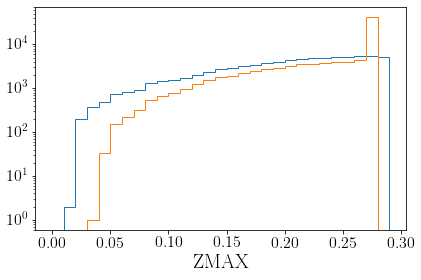

In [14]:
_ = pl.hist( gama_ddp['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')

pl.xlabel('ZMAX')
pl.yscale('log')

In [15]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03673   , 0.03933423, 0.03966329, 0.09538587])

Text(0, 0.5, '$z_{\\rm max}$')

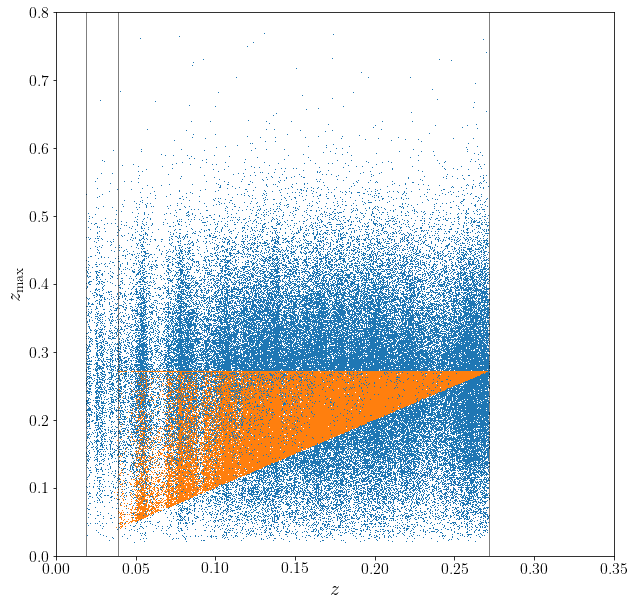

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

ax.axvline(0.0188, c='k', lw=0.5) 
ax.axvline(0.0390, c='k', lw=0.5) 
ax.axvline(0.2715, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 0.80)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

Text(0, 0.5, '$\\langle$ FILL FACTOR $\\rangle$')

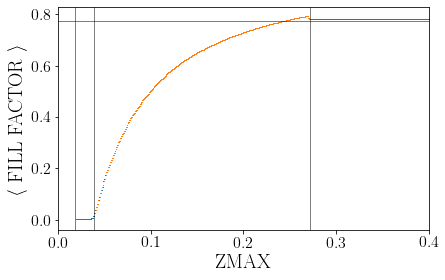

In [17]:
pl.plot(gama_ddp['ZMAX'],   gama_ddp['FILLFACTOR_VMAX'], marker=',', lw=0.0)
pl.plot(gama_vmax['ZMAX'], gama_vmax['FILLFACTOR_VMAX'], marker=',', lw=0.0)

pl.axvline(0.0188, c='k', lw=0.5) 
pl.axvline(0.0390, c='k', lw=0.5) 
pl.axvline(0.2715, c='k', lw=0.5) 

pl.axhline(0.7737,   c='k', lw=0.5)

pl.xlim(0.0, 0.4)

pl.xlabel('ZMAX')
pl.ylabel(r'$\langle$ FILL FACTOR $\rangle$')

Text(0.5, 0, 'RANDSEP [$h^{-1}$Mpc]')

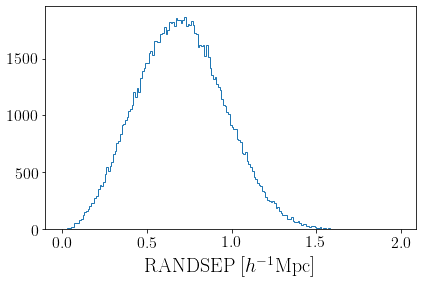

In [41]:
_ = pl.hist(gama_ddp['RANDSEP'], bins=np.arange(0.0, 2.0, 0.01), histtype='step')

pl.xlabel('RANDSEP [$h^{-1}$Mpc]')

(0.2, 1.03)

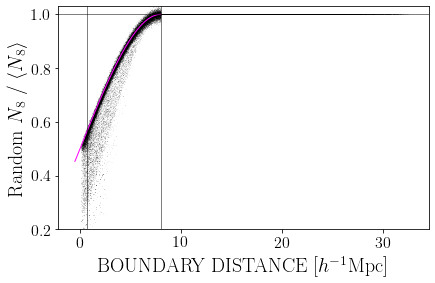

In [42]:
bds = np.arange(-0.5, 8., 0.01)

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')
pl.plot(bds, fillfactor_expectation(bds, radius=8., nbar=1.), lw=1., c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.axvline(np.median(gama_ddp['RANDSEP']), c='k', lw=0.5)

pl.ylim(0.2, 1.03)

In [38]:
dat = Table.read('/cosma5/data/durham/dc-wils7/GAMA4/gama_gold_ddp_n8.fits')
dat

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],WEIGHT_STEPWISE,RANDSEP,RANDMATCH,BOUND_DIST,rFILLFACTOR,RAND_N8,FILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,float64,int64
549207,588848899354199033,130.70116414,-0.54738174,19.775936,0.24403,4,G09_Y3_027_283,5,22.738577,21.094969,19.77204,19.227434,18.854094,0.24403,866.0562678075402,39.687730545562914,G9,0,0,-453.9613011713217,527.7570126127752,-6.650837285875798,450.2627379788677,-530.9095843451346,-7.144298284219827,1.3229294,19.775936,0.9103443215916117,0,6,0.08454315801530732,0.4971282187479143,0.3114175130255997,0.8753033216091071,0.7590435737407114,0.8,-0.2367091,-0.195224,-19.986502828891286,-20.02798792987586,-20.22321193187953,39.762438955600274,39.99914805858852,39.80392405658485,-0.02277792217766615,0.2685832683330129,0.19394695618453495,0.5337585580466762,-19.869032272050223,0.02406311,0.2462738689229305,0.0,-7.775936,0.008418292388940535,0.0,6328807.071248616,0 .. 0,1 .. 0,8.147071422948242,0.8856734653321274,321624,17.44505428099373,1.0,8545,0.9960783504560728,0.7733650644522664,36,0,0,1.7621973381074323,6
227399,587726014009770270,213.35618412,1.18307984,18.552156,0.13983,4,G15_Y1_BN1_177,6,20.862318,19.303232,18.279655,17.857204,17.435226,0.13983,464.8302817683589,38.336472063956535,G15,0,0,-340.55549400327595,-224.18149769255263,8.42005429036397,342.1194200948413,221.80140702024028,8.045119983896583,1.0235767,18.552156,0.9184156031101496,0,6,-0.05196698293774358,0.053194150402302104,0.17476086165853008,0.43430404756896257,0.7640335505397629,0.8,-0.1356351,-0.11186399,-19.823441384396308,-19.847212484142535,-19.959076477250807,38.37559783276056,38.51123292561506,38.39936893250679,-0.0767740349130677,-0.012336310766572156,0.13995084344913342,0.2528389789470911,-19.78863136618691,1.2478428,0.22963472711846333,0.0,-6.5521564,0.0077513168290536845,0.0,5186511.415800967,0 .. 0,1 .. 0,3.44205396266842,0.9856126896536723,194547,13.13541167307219,1.0,8618,1.0045878553809755,0.7582176016618039,17,31,0,0.2933221046394374,4
491670,587729778517213614,212.57571968,-1.39949838,19.216143,0.24972,4,G15_Y3_013_027,6,22.70906,20.863583,19.208324,18.600239,18.132467,0.24972,889.2027223521246,39.74500391824934,G15,0,0,-599.4065970846342,-382.9787075978315,-17.37779434053268,602.0430699336773,378.78982784083576,-18.03760258936332,1.6552582,19.216143,1.1978070223447426,0,7,0.1289923757969123,0.5864435321631076,0.3700726721096227,0.9947857854530082,1.0305450653675519,0.8,-0.24222842,-0.19977601,-20.656705517351376,-20.69915792721485,-20.898933935940015,39.87284817177032,40.11507659035896,39.915300581633794,-0.019709936485799828,0.2848008537591778,0.19701494187640128,0.5499761434728411,-20.483647787118155,0.58

Text(0, 0.5, '$g$FILLFACTOR')

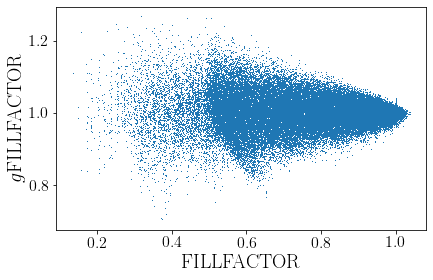

In [43]:
pl.plot(dat['rFILLFACTOR'], dat['FILLFACTOR'] / dat['rFILLFACTOR'], lw=0.0, marker=',')

pl.xlabel('FILLFACTOR')
pl.ylabel(r'$g$FILLFACTOR')

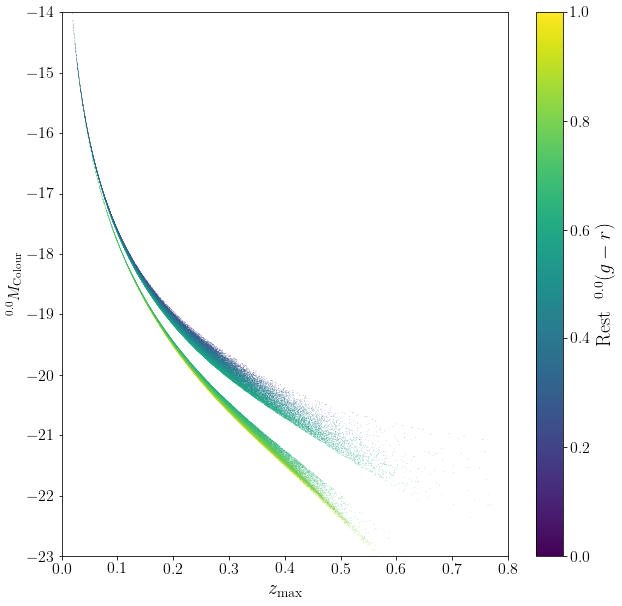

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.0,   0.8)
ax.set_ylim(-23., -14.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

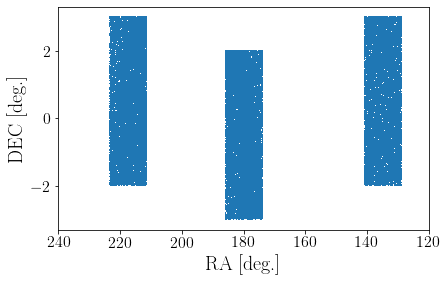

In [12]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [13]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,MEAN_M,MID_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64
-25.4,-25.4,-25.4,0.0,0.0,0.0,0.0,0.0,0.0
-25.48584913809907,-25.48584913809907,-25.200000000000003,6.067895169459533e-07,6.067895169459533e-07,8.158791962347847e-07,8.158791962347847e-07,1.0,0.7437247079546051
-25.0,-25.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0
-24.800000000000004,-24.800000000000004,-24.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0
-24.6,-24.6,-24.6,0.0,0.0,0.0,0.0,0.0,0.0
-24.400000000000006,-24.400000000000006,-24.400000000000006,0.0,0.0,0.0,0.0,0.0,0.0
-24.200000000000003,-24.200000000000003,-24.200000000000003,0.0,0.0,0.0,0.0,0.0,0.0
-24.000000000000007,-24.000000000000007,-24.000000000000007,0.0,0.0,0.0,0.0,0.0,0.0
-23.800000000000004,-23.800000000000004,-23.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, '$V/V_{Max}$')

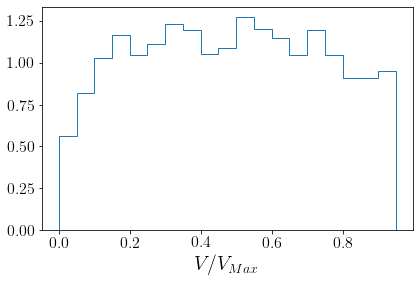

In [14]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

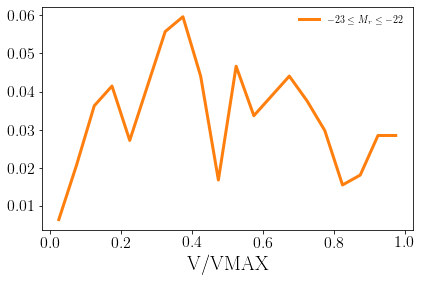

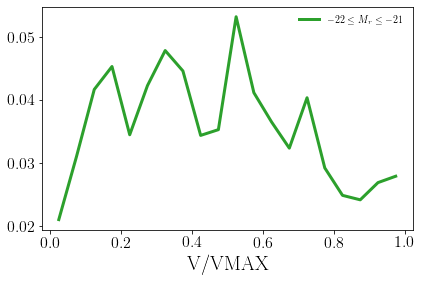

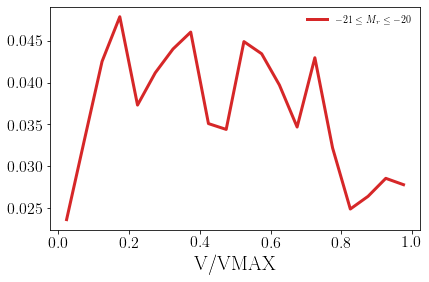

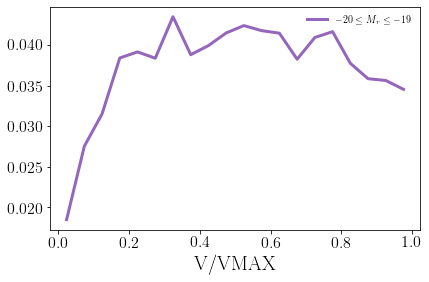

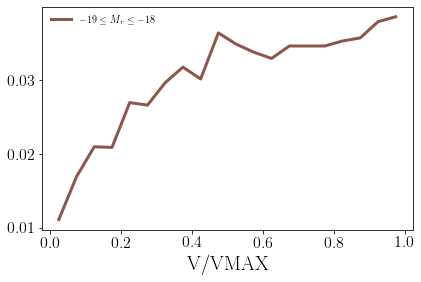

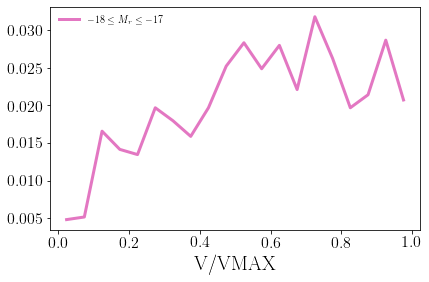

In [15]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [16]:
spurious = gama_zmax[gama_zmax['REST_GMR_0P1_WARN'] > 0.0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
84548,587722983886881328,178.41186365,0.53094523,19.129574,0.14889,4,G12_Y2_042_085,6,28.227417,29.744629,18.847836,29.051346,23.953873,0.14889,497.94976691080626,38.48592766707365,G12,0,0,-433.23304428929094,12.01152005870378,4.016316713129331,433.142899165352,-15.032094939512701,3.5416242870717847,10.896793,19.129574,-99.0,2,1,-0.13889772296610337,-0.0765818069362224,0.022382996340270717,0.051262804552402355,10.867913557266384,0.8,-0.1444233,-0.11911201,-19.234313535404127,-19.25962483407251,-19.37873684139244,38.36388735742561,38.50831066341392,38.389198656093996,-0.07153357457968779,0.01002668527675725,0.14519130378251333,0.27520197499042054,-19.35712184284637,0.6704254,0.2045565206929093,0.0,-7.129574,0.0059108656363813005,0.0,3725782.2344622263


Text(0.5, 0, 'ZSURV')

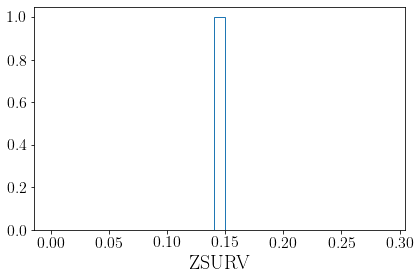

In [17]:
_ = pl.hist(spurious['ZSURV'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZSURV')

Text(0.5, 0, 'GMR')

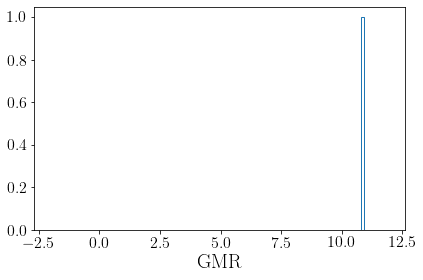

In [18]:
_ = pl.hist(spurious['GMR'], bins=np.arange(-2., 12., 0.1), histtype='step')
pl.xlabel('GMR')

Text(0.5, 0, 'MCOLOR_0P0')

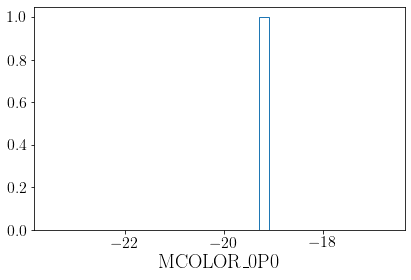

In [19]:
_ = pl.hist(spurious['MCOLOR_0P0'], bins=np.arange(-23.5, -16.5, 0.2), histtype='step')
pl.xlabel('MCOLOR_0P0')

In [22]:
gama_zmax.sort('ZMAX')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,2.0,-5.586954,0.014802823191502936,0.0,--
3575961,587729150374183054,129.57201259,-1.52684958,18.192387,0.26979,4,G09_Y4_203_202,4,18.796778,18.521933,18.19031,18.019787,17.934858,0.26979,971.821741779177,39.9379330547684,G9,0,0,-487.38521327287486,589.7338070693977,-20.392804191308386,483.2386028873673,-593.1179318699727,-20.922412722928343,0.33162308,18.192387,0.06106759233484382,0,1,-0.24046554782359378,0.030089937234125563,-0.0791848285172197,0.1579345487227503,0.09450370015260812,2.12,-0.2616963,-0.5719547,-21.404665290202672,-21.094406871881063,-21.666361599053914,39.59705191739994,39.85874822625118,39.28679349907833,-0.008268597424145471,0.34202323421941305,0.20845628093805563,0.6071985239330764,-21.692306399657948,1.6076126,-99.0,2.0,-6.1923866,0.013743350935792003,0.0,--
3885866,588010930833720024,135.89216253,-1.59989053,19.79879,0.01913,3,G09_Y4_201_099,5,21.111166,19.830143,19.624992,19.463436,19.159803,0.01913,58.23656723127899,33.82597883732409,G9,0,0,-41.014753323858095,39.75694158101026,-1.595428630441649,40.734764295540565,-40.041964586359256,-1.6400720896142431,0.2051506,19.79879,0.21310850995874878,0,2,-0.13476045403622627,-0.14271835974692815,0.029341393698033152,0.00413602535927568,0.23035597258680435,2.12,-0.018556101,-0.0405556,-14.037974151747107,-14.015974652917862,-14.056530252994776,33.83676412977445,33.85532023102212,33.814764630945206,-0.18808820319905228,-0.24293694375240532,0.028636675163148828,0.022238345961257955,-14.037269433212224,0.001209259,0.01914057713140389,0.0,-7.79879,0.0005323764772190999,0.0,3415.9585541320084
8480,588848900987486613,182.47796837,0.67909776,19.789885,0.01915,4,G12_Y1_ND5_288,5,20.860147,19.998114,19.72312,19.643885,19.739418,0.01915,58.298373693126614,33.82828219867051,G12,0,0,-57.14543292081807,-2.4730081465030795,0.6779814634205791,57.16199627827204,2.074481777241864,0.6153362526587615,0.2749939,19.789885,0.29328450892908514,0,2,-0.14091228167316655,-0.15920289411787455,0.025932071473279666,0.006131474570549633,0.29479449338710506,2.12,-0.0185755,-0.040597998,-14.045754202186147,-14.023731705277244,-14.0643

In [20]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,2.0,-5.586954,0.014802823191502936,0.0,--
3575961,587729150374183054,129.57201259,-1.52684958,18.192387,0.26979,4,G09_Y4_203_202,4,18.796778,18.521933,18.19031,18.019787,17.934858,0.26979,971.821741779177,39.9379330547684,G9,0,0,-487.38521327287486,589.7338070693977,-20.392804191308386,483.2386028873673,-593.1179318699727,-20.922412722928343,0.33162308,18.192387,0.06106759233484382,0,1,-0.24046554782359378,0.030089937234125563,-0.0791848285172197,0.1579345487227503,0.09450370015260812,2.12,-0.2616963,-0.5719547,-21.404665290202672,-21.094406871881063,-21.666361599053914,39.59705191739994,39.85874822625118,39.28679349907833,-0.008268597424145471,0.34202323421941305,0.20845628093805563,0.6071985239330764,-21.692306399657948,1.6076126,-99.0,2.0,-6.1923866,0.013743350935792003,0.0,--


In [21]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.